# Problem set 2 {-}
    Bsc. Economics
    Universitat Autònoma de Barcelona

## 1. - Can you calculate these financial performance measures for each of these 21 DMUs? {-}

![image](image.jpg "Title")

## 2. - Based on this information, which is the best and worst DMU for you? {-}

After computing the financial performance measure for all these DMU, we think the worst one is DMU 2, since it has two negatives’ indicators, and moreover, almost every indicator is below the industry average. The first negative indicator is Economic profit, which value is -2,053 and the other indicator is Economic margin with -0,005. This results impliy that firm is not capable of paying back the owner’s fund with revenues.   

For us, the best DMU were apparently 7 and 12, both have an economic profitability of 1.238, but then we realized of something weird, the economic margin was higher for DMU 7 than for DMU 12, even though their respective economic profitability was the same. We decided to increase the amount of decimal place for the economic profitability, and indeed, the value of DMU 7 was slightly higher.   

As a matter of curiosity, almost all indicators of DMU 12 were the biggest ones in the industry, with exception of the ones that did not correspond to Cost, as we have mention before, and Accounting profitability, Accounting margin and Economic margin, but are these were the second ones.   

## 3. - Based on this information, can you provide an assessment of the DMU which has the same numbering as your working group? (Maximum length six lines) {-}

Looking for example, Accounting profit is 102,318, so after paying Total costs with Revenue, the firm has a surplus. Economic profitability is bigger than 1, which means that revenues are bigger than the cost plus the owner’s fund, which implies the firm is getting enough capital to grow and survive. Our firm (14) has an Accounting profitability, Economic profitability, Accounting margin and Economic Margin bigger than the industry. Therefore, we can conclude that our firm is a very competitive one.  

## 4. - We have the following data set: {-}

The provided data is:

In [6]:
import pandas as pd
df = pd.DataFrame({'x1': [4, 7, 8, 4, 2, 10, 2], 'x2': [3, 3, 1, 2, 4, 1, 5]})
df.transpose()

,0,1,2,3,4,5,6
x1,4,7,8,4,2,10,2
x2,3,3,1,2,4,1,5


### Introduction to solve the exercise 4: {-}   
    To solve this problem, we will use python 3.7.
##### Defining the base functions  {-}   
   To compute the frontier we made use of two techniques, the first one was to minimize Phi subject to the different constraints of the technical efficiency frontier using the scipy minimization algorithm library (we will discuss this step further in **section 4.iv**) and the second tool was the Alpha Shape mathematical method given in Python by the algorithm library alphashape that pretty much simplifies a lot the visualisation computation of the efficient points on the frontier using the idea of the alpha-shape. 

## 4.i) Draw the DEA technology for the case of this example {-}

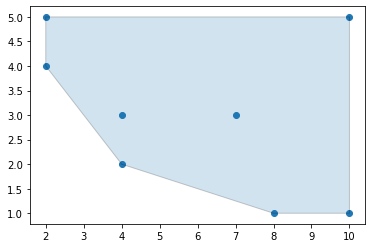

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import alphashape
from descartes import PolygonPatch
from scipy.optimize import minimize

top_right = (df.x1.values.max(), df.x2.values.max())
df.loc[df.shape[0]] = top_right

alpha_shape = alphashape.alphashape(df.values, 0)

fig, ax = plt.subplots()
ax.scatter(x= df.x1, y= df.x2)
ax.add_patch(PolygonPatch(alpha_shape, alpha=0.2))
plt.show()

## 4.ii) Give a list of the observations which are efficient and inefficient {-}

In [3]:
outerpoints = alpha_shape.exterior.coords
efficient = [tuple(i) for i in np.unique(list(filter(lambda x: tuple(x) != top_right, outerpoints)), axis=0)]
inefficient = [tuple(i) for i in list(filter(lambda x: tuple(x) not in efficient and tuple (x) != top_right, df.values))]
efficient

[(2.0, 4.0), (2.0, 5.0), (4.0, 2.0), (8.0, 1.0), (10.0, 1.0)]

Given the list of observations the most efficient observations are:   
**(2.0, 4.0), (2.0, 5.0), (4.0, 2.0), (8.0, 1.0), (10.0, 1.0)**

In [4]:
inefficient

[(4, 3), (7, 3)]

Given the list of observations the most inefficient observations are:   
**(4, 3), (7, 3)**

## 4.iii) Which are the peers/benchmarks of the inefficient observations? {-}

As shown in **section 4.i**:

- For the observation **a** with coordinates **(4, 3)** the references are  **e (2, 4)** and **d (4, 2)**
- For the observation **b** with coordinates **(7, 3)** the references are **d (4, 2)** and **c (8, 1)**

## 4.iv) Write the DEA linear program for the case of this example. {-}

To solve this problem we basically need to solve the following optimization problem:  
$$ min \;  \Phi $$  
Subject to:  
$$ y^{ot} \leq \Sigma_{i=1}^{k} \lambda^{t}_{i} \cdot y_{i}^{t} \tag{1}$$
and:
$$ \Phi \cdot x^{ot} \leq \Sigma_{i=1}^{k} \lambda^{t}_{i} \cdot x_{i}^{t} $$
and:
$$ \Sigma_{i} \lambda_{i} = 1 $$
and:
$$ \lambda \geq 0 $$  
Note *equation 1* is not necessary because if:  
$$y = 1 $$
then: 
$$ y_{t}^{i} = 1 \; \forall i, t \in \mathbb{R} $$
then:
$$y^{ot} \leq \Sigma_{i=1}^{k} \lambda^{t}_{i} \cdot y_{i}^{t} = \Sigma_{i} \lambda_{i} \tag{2}= 1$$

Even though *equation 1* is not needed, as shown in *equation 2*, we used it in order to stick to the original formula. This optimization problem for observation **A** (as asked in **4.v**) can easily be solved using the optimization algorithm given by the **scipy.optimize** module as follows:

Note we first declare the variable to be minized `fun`, then we declare the contraints 4 constraints with the variable `cons` and finally we made use of the optimization algorithm through the variable `res` and finally we captured the optimized results using the variable `res`.

In [5]:
fun = lambda x: x[7]
cons = (
    {'type': 'ineq', 'fun': lambda x:  x[0] + x[1] + x[2] + x[3] + x[4] + x[5] + x[6] - 1}, 
    {'type': 'ineq', 'fun': lambda x:  -1 * (4*x[0] + 7*x[1] + 8*x[2] + 4*x[3] + 2*x[4] + 10*x[5] + 2*x[6]) + 4*x[7]},
    {'type': 'ineq', 'fun': lambda x:  -1 * (3*x[0] + 3*x[1] + x[2] + 2*x[3] + 4*x[4] + x[5] + 5*x[6]) + 3*x[7]},
    {'type': 'eq', 'fun': lambda x:  x[0] + x[1] + x[2] + x[3] + x[4] + x[5] + x[6] - 1},  
)
bnds = [[0, None] for i in range(8)]
res = minimize(fun, [1] * 8, constraints=cons, bounds=bnds)
res

     fun: 0.8571428571428572
     jac: array([0., 0., 0., 0., 0., 0., 0., 1.])
 message: 'Optimization terminated successfully.'
    nfev: 50
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.00000000e+00, 2.01227923e-16, 0.00000000e+00, 7.14285714e-01,
       2.85714286e-01, 9.71445147e-17, 0.00000000e+00, 8.57142857e-01])

## 4.v) Write the solution that you expect for the case of observation A. Which lambdas (or z) should be higher than zero (λ > 0)? Relate the answer to the previous point (iii) {-}

Note that the first 6 values of the vector (array) **x** computed at the last exercise contains the values **lambda a**, **lambda b**, **lambda c**, **lambda d**, **lambda e**, **lambda f** and **lambda g** respectively. The last value of this vector corresponds to the value of **Phi** for observation **a**.  

So, as we computed in the last step for observation **a**, $$ \Phi_{a} = 0.8571428571428572$$ and $$\lambda_{a} = 0$$  
Note that also:
$$\lambda_{b}, \lambda_{c}, \lambda_{f}, \lambda_{g} = 0$$
The lambdas that resulted in this operation higher than zero were **d** and **e**:
$$\lambda_{d} = 7.14285714e-01 \approx 0.714 > 0 $$
$$\lambda_{e} = 2.85714286e-01 \approx 0.286 > 0 $$  
Furthermore note that:  
$$ \lambda_{d} + \lambda_{e} = 1$$

The interesting thing here is that the two lambda's that resulted higher than zero for the optimization problem of observation **a** correspond to the same references **e (2, 4)** and **d (4, 2)** computed in **section 4.ii**. 
Besides, these results give more information, note that the result of the optimized **Phi** is **0.857** and that **0.857** < 1. It means that the inputs **x1** and **x2** should decrease by **14.3%** (14.3% = 0.143 = 1 - 0.857) to be on the efficient frontier. 